## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 1

## 2. Use the CartPole-v0 environment and write a program to : 
### a. Implement the CartPole environment for a certain number of steps 
### b. Implement the CartPole environment for a certain number of episodes 
### c. Compare and comment on the rewards earned for both approaches. 
### d. Plot the cumulative reward of the games and note down the results. 

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [4]:
env = gym.make("CartPole-v1", render_mode="human")

In [5]:
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [6]:
obs_space = env.observation_space
action_space = env.action_space

print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
The action space: Discrete(2)


In [5]:
state, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})
# state, info = env.reset()

print("The initial state is {}".format(state))

The initial state is [ 0.03647037 -0.0892358  -0.05592803 -0.06312564]


2025-02-23 22:19:52.897 Python[59672:2071560] +[IMKClient subclass]: chose IMKClient_Legacy
2025-02-23 22:19:52.897 Python[59672:2071560] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [6]:
num_steps = 100
total_reward_steps = 0
cumulative_rewards_steps = []

done = False
for step in range(num_steps):
    random_action = env.action_space.sample()
    new_obs, reward, terminated, truncated, info = env.step(random_action)
    
    total_reward_steps += reward
    cumulative_rewards_steps.append(total_reward_steps)
    
    if terminated or truncated:
        print(f"Episode finished after {step+1} steps.")
        state, info = env.reset()

Episode finished after 14 steps.
Episode finished after 22 steps.
Episode finished after 40 steps.
Episode finished after 53 steps.
Episode finished after 63 steps.
Episode finished after 77 steps.
Episode finished after 90 steps.


In [11]:
print(f"Total reward for {num_steps} steps approach: {total_reward_steps}")

env.close()

Total reward for 100 steps approach: 100.0


In [12]:
env = gym.make("CartPole-v1", render_mode="human")

In [13]:
num_episodes = 10
total_reward_episodes = 0
cumulative_rewards_episodes = []

for episode in range(num_episodes):
    state, info = env.reset()
    
    done = False
    steps_in_episode = 0
    episode_reward = 0
    
    while not done:
        random_action = env.action_space.sample()
        new_obs, reward, terminated, truncated, info = env.step(random_action)
        
        episode_reward += reward
        steps_in_episode += 1

        if terminated or truncated:
            print(f"Episode {episode + 1} finished after {steps_in_episode} steps.")
            break
        
    total_reward_episodes += episode_reward
    cumulative_rewards_episodes.append(total_reward_episodes)

Episode 1 finished after 20 steps.
Episode 2 finished after 26 steps.
Episode 3 finished after 16 steps.
Episode 4 finished after 20 steps.
Episode 5 finished after 13 steps.
Episode 6 finished after 14 steps.
Episode 7 finished after 16 steps.
Episode 8 finished after 42 steps.
Episode 9 finished after 30 steps.
Episode 10 finished after 16 steps.


In [14]:
print(f"Total reward for {num_episodes} episodes approach: {total_reward_episodes}")

env.close()

Total reward for 10 episodes approach: 213.0


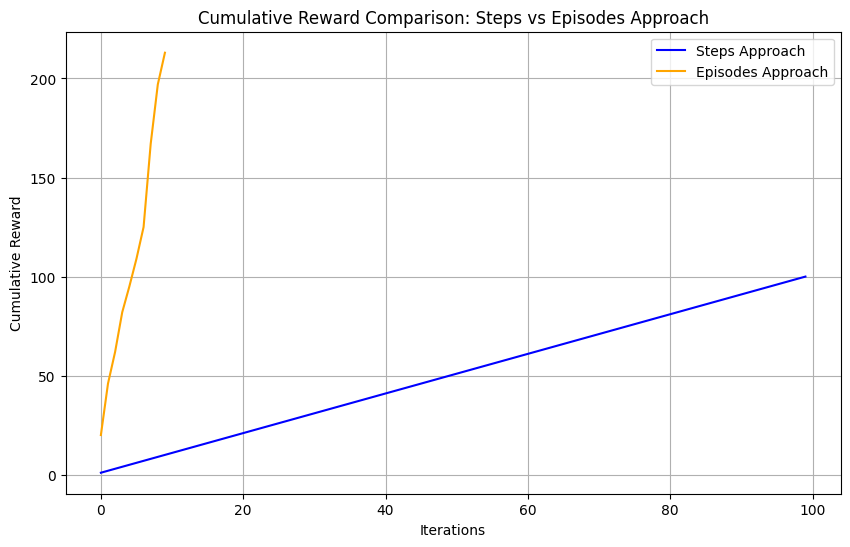

In [15]:
plt.figure(figsize=(10, 6))

plt.plot(range(num_steps), cumulative_rewards_steps, label="Steps Approach", color='blue')
plt.plot(range(num_episodes), cumulative_rewards_episodes, label="Episodes Approach", color='orange')

plt.xlabel("Iterations")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Comparison: Steps vs Episodes Approach")
plt.legend()

plt.grid(True)
plt.show()